# Trabalho Prático - Projeto e Análise de Algoritmos

## Testes

Instalando requisitos

In [1]:
%pip install pandas
%pip install matplotlib
%pip install seaborn

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/40/10/79e52ef01dfeb1c1ca47a109a01a248754ebe990e159a844ece12914de83/pandas-2.2.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for numpy>=1.26.0 from https://files.pythonhosted.org/packages/0f/50/de23fde84e45f5c4fda2488c759b69990fd4512387a8632860f3ac9cd225/numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.1 MB/s eta 0:00:001.1 MB/s eta 0:00:01
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/9c/3d/a121f284241f08268b21359bd425f7d4825cffc5ac5cd0e1b3d82ffd2b10/pytz-2024.1-py2.py3-none-any.whl.metadata
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Obtaining dependency information for tzdata>=2022.7 from https://files.pythonhosted.org/packages/65/58/f9c9e6be752e9fcb8b6a0ee9fb87e6e7a1f6bca

In [10]:
import subprocess
import pandas
import numpy
import matplotlib
import matplotlib.pyplot
import seaborn

Definindo variáveis

In [3]:
#arquivos = ['5_franquias_2_lojas.txt', 'exemplo_professor.txt']
distancias_minimas=[0, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
algoritmos=['forca-bruta', 'branch-and-bound']
entradas = [[5, 2, '5_franquias_2_lojas.txt'], [_, _, 'exemplo_professor.txt']]

Executando o programa e salvando a saida

In [4]:
dados = []
for _ in range(3):
    for entrada in entradas:
        for distancia_minima in distancias_minimas:
            for algoritmo in algoritmos:
                saida = subprocess.run(['java -jar app.jar --calcular-tempo --arquivo-dados {} --distancia-minima {} --algoritmo {}'.format(entrada[2], distancia_minima, algoritmo)], shell=True, capture_output=True, text=True)
                algoritmo = 'Força Bruta' if algoritmo == 'forca-bruta' else 'Branch and Bound'
                dados.append([entrada[0], entrada[1], distancia_minima, algoritmo, saida.stdout.replace('\n', '').replace('ns', ''), entrada[2]])

Criando um pandas data frame

In [5]:
legenda = ['Número de Franquias', 'Número de Lojas por franquia', 'Distância Mínima', 'Algoritmo', 'Tempo de Execução', 'Arquivo de Dados']

In [6]:
dados = pandas.DataFrame(dados, columns=legenda)

In [14]:
dados

,Número de Franquias,Número de Lojas por franquia,Distância Mínima,Algoritmo,Tempo de Execução,Arquivo de Dados
0,5,2,0,Força Bruta,1068160,5_franquias_2_lojas.txt
1,5,2,0,Branch and Bound,709278,5_franquias_2_lojas.txt
2,5,2,1,Força Bruta,844842,5_franquias_2_lojas.txt
3,5,2,1,Branch and Bound,758183,5_franquias_2_lojas.txt
4,5,2,2,Força Bruta,735211,5_franquias_2_lojas.txt
...,...,...,...,...,...,...
139,,,256,Branch and Bound,15640993,exemplo_professor.txt
140,,,512,Força Bruta,1221384420,exemplo_professor.txt
141,,,512,Branch and Bound,16897473,exemplo_professor.txt
142,,,1024,Força Bruta,1136177725,exemplo_professor.txt


Exportando dados

In [7]:
dados.to_csv('dados.csv', index=False)

In [55]:
dados

,Número de Franquias,Número de Lojas por franquia,Distância Mínima,Algoritmo,Tempo de Execução,Arquivo de Dados
0,5,2,0,Força Bruta,1068160,5_franquias_2_lojas.txt
1,5,2,0,Branch and Bound,709278,5_franquias_2_lojas.txt
2,5,2,1,Força Bruta,844842,5_franquias_2_lojas.txt
3,5,2,1,Branch and Bound,758183,5_franquias_2_lojas.txt
4,5,2,2,Força Bruta,735211,5_franquias_2_lojas.txt
...,...,...,...,...,...,...
139,,,256,Branch and Bound,15640993,exemplo_professor.txt
140,,,512,Força Bruta,1221384420,exemplo_professor.txt
141,,,512,Branch and Bound,16897473,exemplo_professor.txt
142,,,1024,Força Bruta,1136177725,exemplo_professor.txt


Gerando gráficos

In [63]:
dados_media = {}
for index, row in dados.iterrows():
    if not (row['Algoritmo'], row['Distância Mínima']) in dados_media:
        dados_media.setdefault((row['Algoritmo'], row['Distância Mínima']), 0)
    else:
        dados_media[(row['Algoritmo'], row['Distância Mínima'])] += int(row['Tempo de Execução'])

dados_media

{('Força Bruta', 0): 4333538,
 ('Branch and Bound', 0): 4530502,
 ('Força Bruta', 1): 4670495,
 ('Branch and Bound', 1): 4451152,
 ('Força Bruta', 2): 5021690,
 ('Branch and Bound', 2): 4304127,
 ('Força Bruta', 4): 4212474,
 ('Branch and Bound', 4): 4519494,
 ('Força Bruta', 8): 4947791,
 ('Branch and Bound', 8): 4589376,
 ('Força Bruta', 16): 5219437,
 ('Branch and Bound', 16): 5202973,
 ('Força Bruta', 32): 7974122,
 ('Branch and Bound', 32): 49431543,
 ('Força Bruta', 64): 28017136,
 ('Branch and Bound', 64): 43542450,
 ('Força Bruta', 128): 539621640,
 ('Branch and Bound', 128): 81483162,
 ('Força Bruta', 256): 2080926434,
 ('Branch and Bound', 256): 68273633,
 ('Força Bruta', 512): 3912678768,
 ('Branch and Bound', 512): 60378959,
 ('Força Bruta', 1024): 4534307082,
 ('Branch and Bound', 1024): 65913969}

In [67]:
dados_grafico = {
    'Algoritmo': [],
    'Distância Mínima': [],
    'Tempo de Execução': []
}

for key, value in dados_media.items():
    algoritmo, distancia_minima = key
    tempo_execucao = value / 3
    dados_grafico['Algoritmo'].append(algoritmo)
    dados_grafico['Distância Mínima'].append(distancia_minima)
    dados_grafico['Tempo de Execução'].append(tempo_execucao)
    

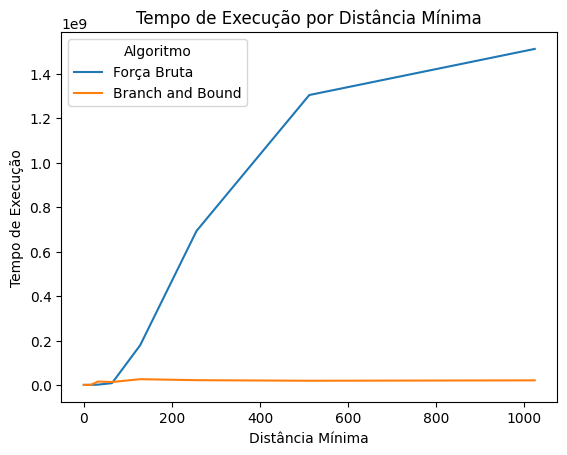

In [69]:
matplotlib.pyplot.figure()
seaborn.lineplot(x="Distância Mínima", y="Tempo de Execução", hue="Algoritmo", data=dados_grafico, style='Algoritmo', dashes=False)
matplotlib.pyplot.title('Tempo de Execução por Distância Mínima')
matplotlib.pyplot.xlabel('Distância Mínima')
matplotlib.pyplot.ylabel('Tempo de Execução')
matplotlib.pyplot.legend(title='Algoritmo')

matplotlib.pyplot.show()

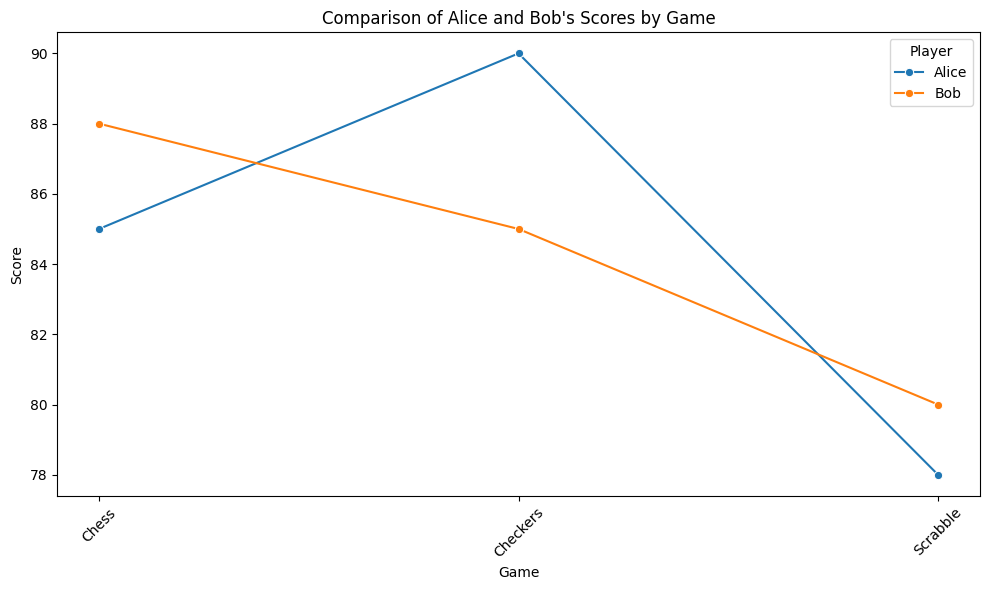

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame
data = {
    'Name': ['Alice', 'Alice', 'Alice', 'Bob', 'Bob', 'Bob'],
    'Game': ['Chess', 'Checkers', 'Scrabble', 'Chess', 'Checkers', 'Scrabble'],
    'Score': [85, 90, 78, 88, 85, 80]
}

df = pd.DataFrame(data)

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Create a lineplot for each player
sns.lineplot(x='Game', y='Score', hue='Name', data=df, marker='o', style='Name', dashes=False)

# Add titles and labels
plt.title('Comparison of Alice and Bob\'s Scores by Game')
plt.xlabel('Game')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Player')

# Show plot
plt.tight_layout()
plt.show()


In [26]:
data

{'Name': ['Alice', 'Alice', 'Alice', 'Bob', 'Bob', 'Bob'],
 'Game': ['Chess', 'Checkers', 'Scrabble', 'Chess', 'Checkers', 'Scrabble'],
 'Score': [85, 90, 78, 88, 85, 80]}

In [29]:
dados_grafico.to_dict()

{'Distância Mínima': {0: 0,
  1: 0,
  2: 1,
  3: 1,
  4: 2,
  5: 2,
  6: 4,
  7: 4,
  8: 8,
  9: 8,
  10: 16,
  11: 16,
  12: 32,
  13: 32,
  14: 64,
  15: 64,
  16: 128,
  17: 128,
  18: 256,
  19: 256,
  20: 512,
  21: 512,
  22: 1024,
  23: 1024,
  24: 0,
  25: 0,
  26: 1,
  27: 1,
  28: 2,
  29: 2,
  30: 4,
  31: 4,
  32: 8,
  33: 8,
  34: 16,
  35: 16,
  36: 32,
  37: 32,
  38: 64,
  39: 64,
  40: 128,
  41: 128,
  42: 256,
  43: 256,
  44: 512,
  45: 512,
  46: 1024,
  47: 1024,
  48: 0,
  49: 0,
  50: 1,
  51: 1,
  52: 2,
  53: 2,
  54: 4,
  55: 4,
  56: 8,
  57: 8,
  58: 16,
  59: 16,
  60: 32,
  61: 32,
  62: 64,
  63: 64,
  64: 128,
  65: 128,
  66: 256,
  67: 256,
  68: 512,
  69: 512,
  70: 1024,
  71: 1024,
  72: 0,
  73: 0,
  74: 1,
  75: 1,
  76: 2,
  77: 2,
  78: 4,
  79: 4,
  80: 8,
  81: 8,
  82: 16,
  83: 16,
  84: 32,
  85: 32,
  86: 64,
  87: 64,
  88: 128,
  89: 128,
  90: 256,
  91: 256,
  92: 512,
  93: 512,
  94: 1024,
  95: 1024,
  96: 0,
  97: 0,
  98: 1,
  9